# CSE-221710308025-K.SAHITH REDDY

In [23]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


--2020-07-13 08:28:09--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  87.2MB/s    in 0.8s    

2020-07-13 08:28:10 (87.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [24]:
import os
import zipfile
local_zip="/tmp/cats_and_dogs_filtered.zip"
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [25]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [26]:
os.listdir("/tmp/cats_and_dogs_filtered/train")

['cats', 'dogs']

In [27]:
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/dogs")))
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/cats")))

1000
1000


In [28]:
base_dir="/tmp/cats_and_dogs_filtered"
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
#training with cat images
train_cat=os.path.join(train_dir,'cats')
train_dog=os.path.join(train_dir,'dogs')
validation_cat=os.path.join(validation_dir,'cats')
validation_dog=os.path.join(validation_dir,'dogs')

In [29]:
# File name
file_name_dir=os.listdir(train_cat)
file_name_dir[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

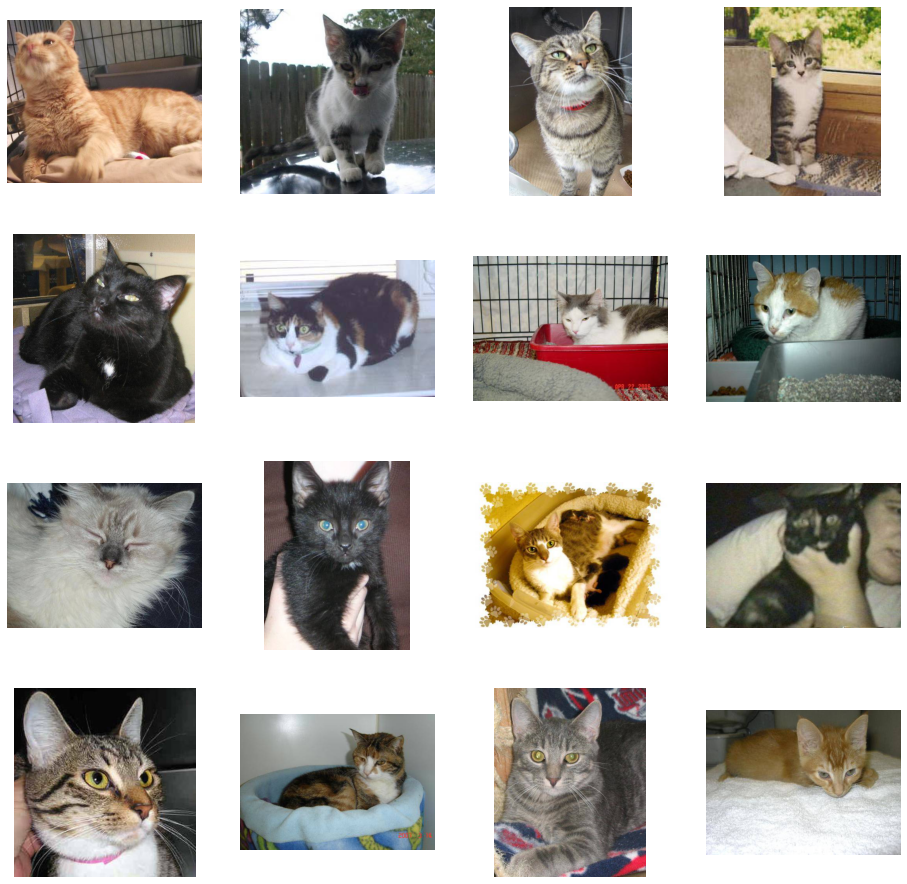

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1
for i in range(16):
  img=plt.imread(os.path.join(train_cat,file_name_dir[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.axis('off')

  j+=1

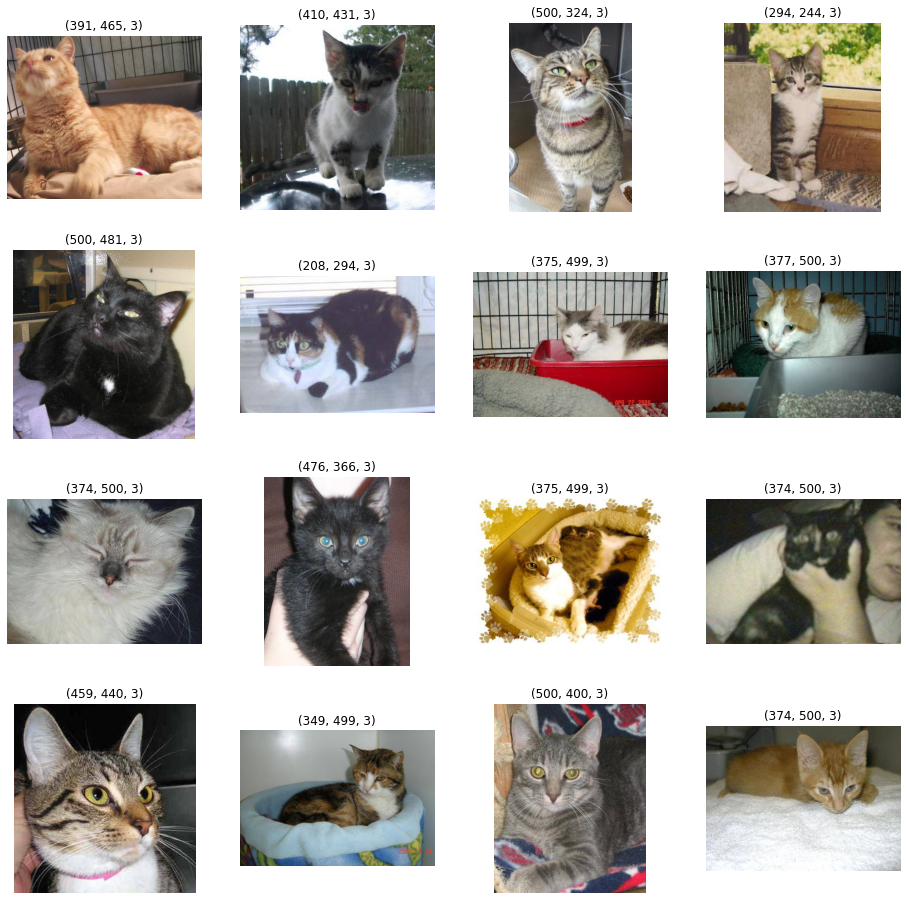

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1
for i in range(16):
  img=plt.imread(os.path.join(train_cat,file_name_dir[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')

  j+=1

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
train_generator

(20, 150, 150, 3)
(20,)


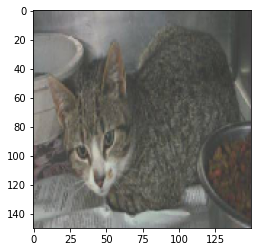

In [34]:
imgs,labels=train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

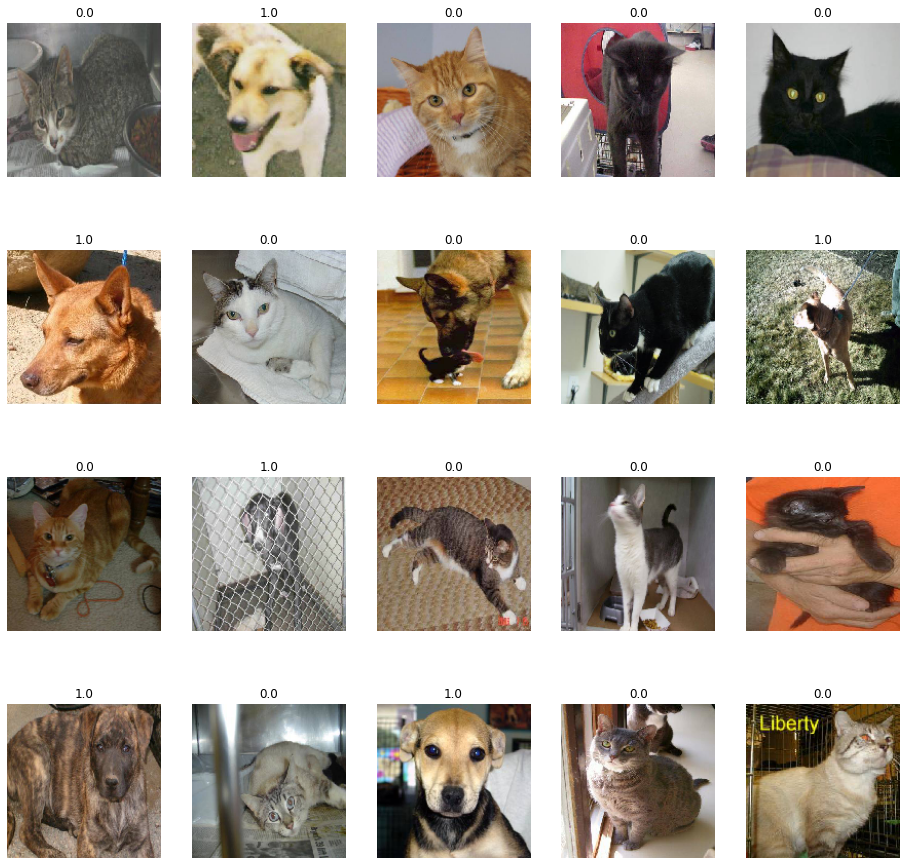

In [35]:
plt.figure(figsize=(16,16))
pos=1
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])
  plt.title(labels[i])
  plt.axis('off')
  pos+=1
  #here for dog image we get 1 as title and for cat image we get o as title indicating binary representation

Build the Model


In [36]:
#import required 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [37]:
model=Sequential()
#add a conv layer followed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
#convert featuremap to 1D array
model.add(Flatten())
#Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
#Final output layer
model.add(Dense(1,activation='sigmoid'))
#summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9248)             

In [38]:
#compiling model
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [39]:
# fit
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 8s 78ms/step - loss: 0.7249 - accuracy: 0.5350 - val_loss: 0.6567 - val_accuracy: 0.6710
Epoch 2/15
100/100 [==============================] - 8s 76ms/step - loss: 0.6296 - accuracy: 0.6455 - val_loss: 0.6386 - val_accuracy: 0.6150
Epoch 3/15
100/100 [==============================] - 8s 76ms/step - loss: 0.5798 - accuracy: 0.7035 - val_loss: 0.6224 - val_accuracy: 0.6400
Epoch 4/15
100/100 [==============================] - 8s 77ms/step - loss: 0.4963 - accuracy: 0.7640 - val_loss: 0.6354 - val_accuracy: 0.6680
Epoch 5/15
100/100 [==============================] - 8s 77ms/step - loss: 0.4294 - accuracy: 0.7930 - val_loss: 0.6763 - val_accuracy: 0.6740
Epoch 6/15
100/100 [==============================] - 8s 80ms/step - loss: 0.3399 - accuracy: 0.8490 - val_loss: 0.6042 - val_accuracy: 0.7120
Epoch 7/15
100/100 [==============================] - 8s 78ms/step - loss: 0.2356 - accuracy: 0.9070 - val_loss: 0.7258 - val_accuracy: 0.7070

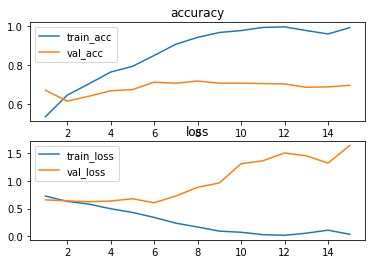

In [40]:
train_accuracy=history.history['accuracy']
val_acc=history.history['val_accuracy']
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epoches=list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epoches,train_accuracy,label='train_acc')
plt.plot(epoches,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epoches,train_loss,label='train_loss')
plt.plot(epoches,val_loss,label='val_loss')
plt.title('loss')
plt.legend()


Second Model


In [41]:
model=Sequential()
#add a conv layer followed by maxpooling
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(128,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
#convert featuremap to 1D array
model.add(Flatten())
#Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
#Final output layer
model.add(Dense(1,activation='sigmoid'))
#summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

In [42]:
#compiling model
import tensorflow as tf
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [43]:
# fit
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 8s 80ms/step - loss: 0.7131 - accuracy: 0.5230 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 2/15
100/100 [==============================] - 8s 79ms/step - loss: 0.6885 - accuracy: 0.5265 - val_loss: 0.6611 - val_accuracy: 0.6200
Epoch 3/15
100/100 [==============================] - 8s 79ms/step - loss: 0.6833 - accuracy: 0.5495 - val_loss: 0.6820 - val_accuracy: 0.5440
Epoch 4/15
100/100 [==============================] - 8s 79ms/step - loss: 0.6497 - accuracy: 0.6140 - val_loss: 0.6390 - val_accuracy: 0.6300
Epoch 5/15
100/100 [==============================] - 8s 80ms/step - loss: 0.5846 - accuracy: 0.6830 - val_loss: 0.6522 - val_accuracy: 0.6360
Epoch 6/15
100/100 [==============================] - 8s 80ms/step - loss: 0.5182 - accuracy: 0.7355 - val_loss: 0.7369 - val_accuracy: 0.6560
Epoch 7/15
100/100 [==============================] - 8s 79ms/step - loss: 0.4329 - accuracy: 0.7935 - val_loss: 0.6747 - val_accuracy: 0.6990

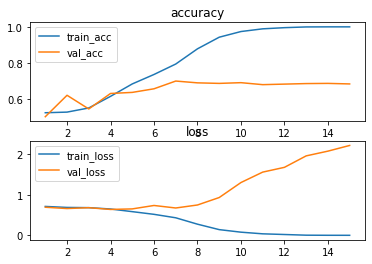

In [44]:
train_accuracy=history.history['accuracy']
val_acc=history.history['val_accuracy']
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epoches=list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epoches,train_accuracy,label='train_acc')
plt.plot(epoches,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epoches,train_loss,label='train_loss')
plt.plot(epoches,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

Model 1 is an overfitting model as we can see there is a huge diff b/w train_accuracy and val_accuracy
Model 2 is also an overfitting model but slightly better than model 1 as train_accuracy in model 2 has greater value than model 1. 